In [1]:
#Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

In [2]:
#Import CSV data
happy15=pd.DataFrame(pd.read_csv('CSVs/Happiness_2015.csv'))
doctors=pd.DataFrame(pd.read_csv('CSVs/physicians-per-1000-people.csv'))
doctors.head()

,Entity,Code,Year,"Physicians (per 1,000 people) (per 1,000 people)"
0,Afghanistan,AFG,1960,0.035
1,Afghanistan,AFG,1965,0.063
2,Afghanistan,AFG,1970,0.065
3,Afghanistan,AFG,1981,0.077
4,Afghanistan,AFG,1986,0.183


In [6]:
#Clean up physicians dataframe
doctors=doctors[doctors['Year']==2015]
doctors=doctors.rename(columns={'Entity':'Country', 'Physicians (per 1,000 people) (per 1,000 people)':'Physicians (per 1,000 people)'})
doctors2=doctors[['Country','Code','Physicians (per 1,000 people)']]
doctors2.head()


,Country,Code,"Physicians (per 1,000 people)"
20,Afghanistan,AFG,0.302
77,Andorra,AND,3.690
176,Australia,AUS,3.496
228,Austria,AUT,5.150
290,Bahrain,BHR,0.922


In [9]:
#Import csv with ISO country codes
iso=pd.read_csv('csvs/country_iso.csv')
iso=iso.drop(['Unnamed: 0'], axis=1)
iso=iso.rename(columns={'iso_a3':'Code', 'Happiness score':'2019 Happiness Score'})
iso.head()

,Country,2019 Happiness Score,Code
0,Finland,7.769,FIN
1,Denmark,7.600,DNK
2,Norway,7.554,NOR
3,Iceland,7.494,ISL
4,Netherlands,7.488,NLD


In [20]:
#Merge doctor data with ISO codes
happy = pd.merge(doctors2,iso,on='Code',how='inner')
happy=happy.drop(['Country_y'],axis=1)
happy=happy.rename(columns={'Country_x':'Country'})
happy.head()

,Country,Code,"Physicians (per 1,000 people)",2019 Happiness Score
0,Afghanistan,AFG,0.302,3.203
1,Australia,AUS,3.496,7.228
2,Austria,AUT,5.150,7.246
3,Bahrain,BHR,0.922,6.199
4,Bangladesh,BGD,0.472,4.456


In [21]:
#Select columns from happiness data
happy15=happy15[['Country','Happiness Score']]
happy.head()

,Country,Code,"Physicians (per 1,000 people)",2019 Happiness Score
0,Afghanistan,AFG,0.302,3.203
1,Australia,AUS,3.496,7.228
2,Austria,AUT,5.150,7.246
3,Bahrain,BHR,0.922,6.199
4,Bangladesh,BGD,0.472,4.456


In [22]:
happy_doctors = pd.merge(happy15, happy, on='Country', how='inner')
happy_doctors.head()

,Country,Happiness Score,Code,"Physicians (per 1,000 people)",2019 Happiness Score
0,Switzerland,7.587,CHE,4.189,7.480
1,Iceland,7.561,ISL,3.791,7.494
2,Norway,7.522,NOR,4.385,7.554
3,Canada,7.427,CAN,2.539,7.278
4,Netherlands,7.378,NLD,3.478,7.488


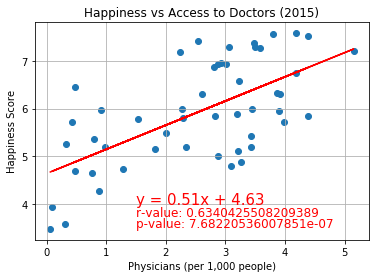

R-value: 0.6340425508209389, P-value: 7.68220536007851e-07


In [23]:
#Linear Regression!
y_values=happy_doctors['Happiness Score']
x_values=happy_doctors['Physicians (per 1,000 people)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('Happiness vs Access to Doctors (2015)')
plt.xlabel('Physicians (per 1,000 people)')
plt.ylabel('Happiness Score')
r_value=(f"r-value: {rvalue}")
p_value=(f"p-value: {pvalue}")
plt.annotate(line_eq,(1.5,4),fontsize=15,color="red")
plt.annotate(r_value,(1.5,3.75),fontsize=12,color="red")
plt.annotate(p_value,(1.5,3.5),fontsize=12,color="red")
plt.grid()
plt.savefig('Images/doctors.png')
plt.show()
print(f"R-value: {rvalue}, P-value: {pvalue}")

In [12]:
#Moderate positive correlation!


50

In [24]:
#import dataset with geographic info to plot chorograph
import geopandas 

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world.rename(columns={'iso_a3':'Code'}) 
world = pd.merge(world, happy_doctors, on='Code', how='inner')
world.head()

,pop_est,continent,name,Code,gdp_md_est,geometry,Country,Happiness Score,"Physicians (per 1,000 people)",2019 Happiness Score
0,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.840 49.000, -122.974 49.0...",Canada,7.427,2.539,7.278
1,142257519,Europe,Russia,RUS,3745000.0,"MULTIPOLYGON (((178.725 71.099, 180.000 71.516...",Russia,5.716,3.975,5.648
2,54841552,Africa,South Africa,ZAF,739100.0,"POLYGON ((16.345 -28.577, 16.824 -28.082, 17.2...",South Africa,4.642,0.767,4.722
3,124574795,North America,Mexico,MEX,2307000.0,"POLYGON ((-117.128 32.535, -115.991 32.612, -1...",Mexico,7.187,2.231,6.595
4,2990561,North America,Jamaica,JAM,25390.0,"POLYGON ((-77.570 18.491, -76.897 18.401, -76....",Jamaica,5.709,0.429,5.890


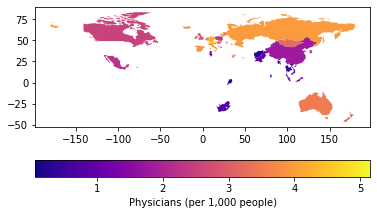

In [25]:
#Chorograph of Physician availability
fig, ax = plt.subplots(1,1)
world.plot(column='Physicians (per 1,000 people)', ax=ax, legend=True, cmap='plasma',
           legend_kwds={'label': "Physicians (per 1,000 people)",'orientation': "horizontal"})
plt.savefig('Images/physician_availability_map.png')

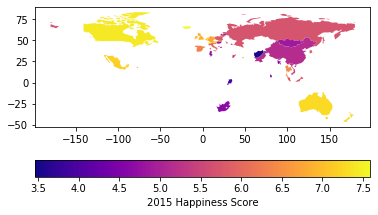

In [26]:
#Chorograph of Physician availability
fig, ax = plt.subplots(1,1)
world.plot(column='Happiness Score', ax=ax, legend=True, cmap='plasma',
           legend_kwds={'label': "2015 Happiness Score",'orientation': "horizontal"})
plt.savefig('Images/2015_happiness_map.png')